In [24]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

def parser(x):
    return datetime.strptime(x,'%Y')

df = pd.read_csv('D:\SourceFiles/carrotPop.csv',parse_dates=[0],date_parser=parser)

In [25]:
df = df.set_index('Year ')

In [26]:
train, test = df[:40], df[40:]

In [27]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [28]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [29]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
5/5 [==============================] - 0s 89ms/step - loss: 0.2780
Epoch 2/90
5/5 [==============================] - 0s 14ms/step - loss: 0.1857
Epoch 3/90
5/5 [==============================] - ETA: 0s - loss: 0.161 - 0s 14ms/step - loss: 0.0944
Epoch 4/90
5/5 [==============================] - 0s 14ms/step - loss: 0.0199
Epoch 5/90
5/5 [==============================] - 0s 15ms/step - loss: 0.0333
Epoch 6/90
5/5 [==============================] - 0s 14ms/step - loss: 0.0207
Epoch 7/90
5/5 [==============================] - 0s 13ms/step - loss: 0.0249
Epoch 8/90
5/5 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 9/90
5/5 [==============================] - 0s 14ms/step - loss: 0.0164
Epoch 10/90
5/5 [==============================] - 0s 13ms/step - loss: 0.0215
Epoch 11/90
5/5 [==============================] - 0s 15ms/step - loss: 0.0188
Epoch 12/90
5/5 [==============================] - 0s 16ms/step - loss: 0.0170
Epoch 13/90
5/5 [====================

In [31]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [32]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


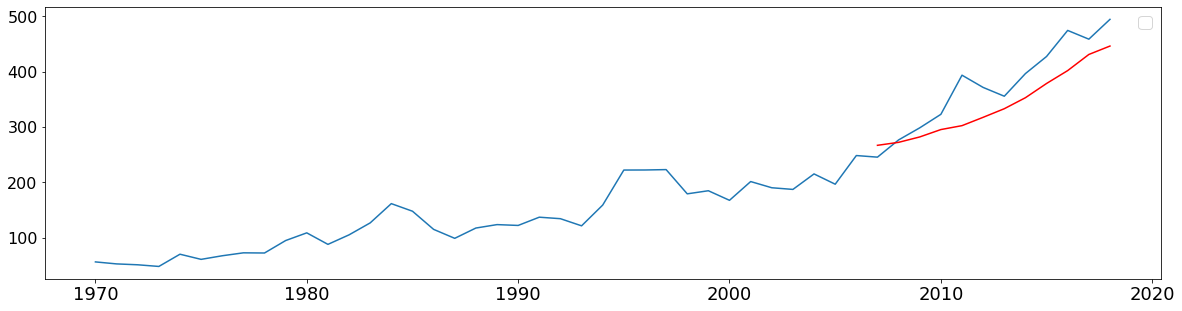

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Imports2'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [34]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [46.44925957]


In [35]:
train = df

In [36]:
scaler.fit(train)
train = scaler.transform(train)

In [37]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [38]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
7/7 [==============================] - 0s 14ms/step - loss: 0.0151
Epoch 2/90
7/7 [==============================] - 0s 15ms/step - loss: 0.0097
Epoch 3/90
7/7 [==============================] - 0s 16ms/step - loss: 0.0102
Epoch 4/90
7/7 [==============================] - 0s 14ms/step - loss: 0.0107
Epoch 5/90
7/7 [==============================] - 0s 16ms/step - loss: 0.0103
Epoch 6/90
7/7 [==============================] - 0s 16ms/step - loss: 0.0082
Epoch 7/90
7/7 [==============================] - 0s 16ms/step - loss: 0.0075
Epoch 8/90
7/7 [==============================] - 0s 15ms/step - loss: 0.0056
Epoch 9/90
7/7 [==============================] - 0s 15ms/step - loss: 0.0072
Epoch 10/90
7/7 [==============================] - 0s 15ms/step - loss: 0.0072
Epoch 11/90
7/7 [==============================] - 0s 14ms/step - loss: 0.0075
Epoch 12/90
7/7 [==============================] - 0s 16ms/step - loss: 0.0098
Epoch 13/90
7/7 [==============================] - 0s 16ms/st

In [39]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [43]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [44]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


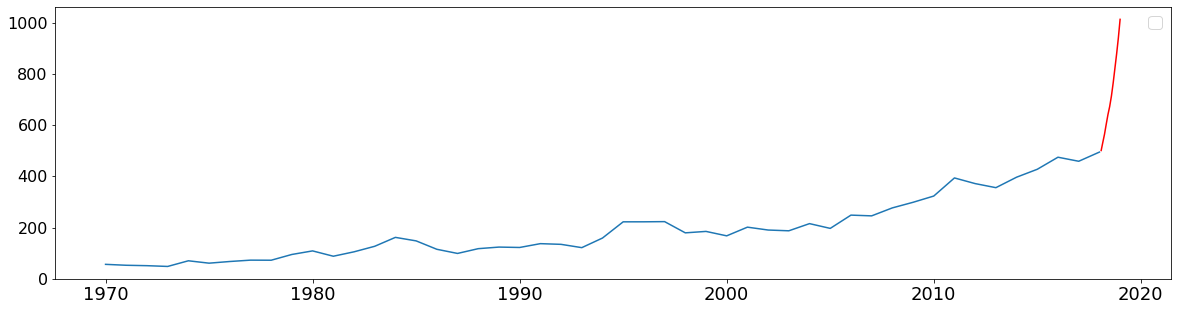

In [45]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Imports2'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()